In [2]:
import numpy as np
import matplotlib.pyplot as plt

yfull = np.loadtxt('./emulator/yFull.txt')
yshort = np.loadtxt('./emulator/yShort.txt')
logk = np.loadtxt('./emulator/logk.txt')
params_ce = np.loadtxt('./emulator/params_ce.txt')

k=10**logk

## Unit test #1 - neutrinoless models vs emulator inputs at z=0

[Text(0.5, 0, 'k (1/Mpc)'), Text(0, 0.5, 'code/emu - 1'), None]

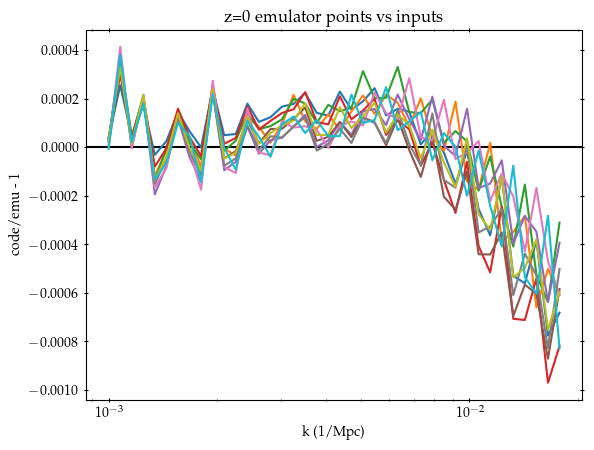

In [3]:
fig, ax = plt.subplots()
ax.set_title("z=0 emulator points vs inputs")
ax.axhline(0, color='black')

for keys in range(10):
    rf = np.loadtxt(f"./output/redTime_M{keys+1:03d}.dat")
    h = params_ce.T[keys][3]
    s8 = params_ce.T[keys][2]
    b = 10 ** yfull[-351:, keys]  # input data at z=0 (full inputs)
    
    kcode = rf[-128:, 0] * h  # correct to physical units
    # note k^3/(2pi^2) definition difference here as well as h^3 correction
    lin = (rf[-128:, 3] / h**3 / (2 * np.pi**2) * kcode**1.5)  
    nlin = rf[-128:, 7] / h**3 / (2 * np.pi**2) * kcode**1.5
    
    # interploate to same k values
    nlin = 10**np.interp(logk[:40], np.log10(kcode), np.log10(nlin))
    ax.plot(k[:40], nlin/b[:40]-1)
ax.set(xlabel="k (1/Mpc)", ylabel="code/emu - 1", xscale="log")

## Unit test #2 - neutrino models vs emulator inputs at z=0

[Text(0.5, 0, 'k (1/Mpc)'), Text(0, 0.5, 'code/emu - 1'), None]

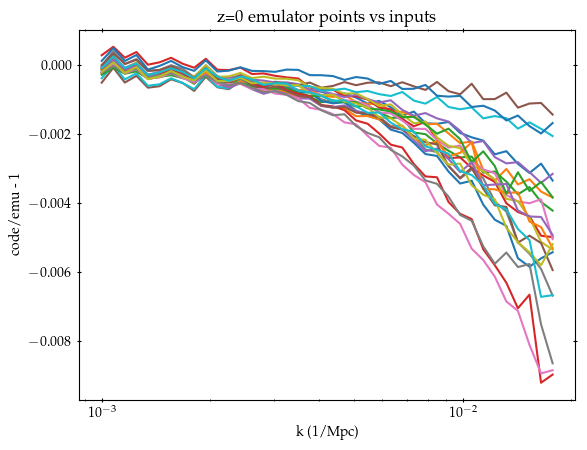

In [6]:
fig, ax = plt.subplots()
ax.set_title('z=0 emulator points vs inputs')

for keys in range(11,32):
    rf = np.loadtxt(f'./output/redTime_M{keys+1:03d}.dat')
    h = params_ce.T[keys][3]
    s8 = params_ce.T[keys][2]
    b = 10**yfull[-351:,keys] # input data at z=0 (full inputs)  
    
    om_nu = params_ce.T[keys][7]
    om_m = params_ce.T[keys][0]
    
    kk = rf[-128:,0]*h # correct to physical units 
    lin = rf[-128:,3]/h**3/(2*np.pi**2)*kk**1.5 # note k^3/(2pi^2) definition difference here as well as h^3 correction
    nlin = rf[-128:,7]/h**3/(2*np.pi**2)*kk**1.5
    lin_nu = rf[-128:,6]/h**3/(2*np.pi**2)*kk**1.5
    
    # neutrino correction
    trans_p = np.sqrt(lin_nu/lin)
    beta_p = trans_p *(om_nu/om_m)
    f = 1. - om_nu/om_m + beta_p
    nlin = nlin * f**2
    
    nlin = 10**np.interp(logk[:40], np.log10(kk), np.log10(nlin))
    ax.plot(k[:40], nlin/b[:40]-1)
    
ax.set(xlabel="k (1/Mpc)", ylabel="code/emu - 1", xscale="log")